In [1]:
#1. Load the dataset and display its shape, column names, and first 5 rows.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("D:\MUFG\gold_price_data.csv")
df.head()

,date,open,high,low,close,adj_close,volume
0,2004-11-18,44.380001,44.380001,44.490002,44.070000,44.430000,5992000
1,2004-11-19,44.779999,44.779999,44.919998,44.470001,44.490002,11655300
2,2004-11-22,44.950001,44.950001,44.970001,44.740002,44.750000,11996000
3,2004-11-23,44.750000,44.750000,44.919998,44.720001,44.880001,3169200
4,2004-11-24,45.049999,45.049999,45.049999,44.790001,44.930000,6105100


In [2]:
df.shape

(5215, 7)

In [3]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume'], dtype='object')

In [4]:
df.head(5)

,date,open,high,low,close,adj_close,volume
0,2004-11-18,44.380001,44.380001,44.490002,44.070000,44.430000,5992000
1,2004-11-19,44.779999,44.779999,44.919998,44.470001,44.490002,11655300
2,2004-11-22,44.950001,44.950001,44.970001,44.740002,44.750000,11996000
3,2004-11-23,44.750000,44.750000,44.919998,44.720001,44.880001,3169200
4,2004-11-24,45.049999,45.049999,45.049999,44.790001,44.930000,6105100


In [5]:
#2. Check for missing values and duplicates. Clean the dataset if necessary.
df.isnull()

,date,open,high,low,close,adj_close,volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
5210,False,False,False,False,False,False,False
5211,False,False,False,False,False,False,False
5212,False,False,False,False,False,False,False
5213,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64

In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5210    False
5211    False
5212    False
5213    False
5214    False
Length: 5215, dtype: bool

In [8]:
df.duplicated().sum()

0

In [9]:
#3. Perform exploratory data analysis (EDA): show descriptive statistics and visualize distributions of key features.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5215 entries, 0 to 5214
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       5215 non-null   object 
 1   open       5215 non-null   float64
 2   high       5215 non-null   float64
 3   low        5215 non-null   float64
 4   close      5215 non-null   float64
 5   adj_close  5215 non-null   float64
 6   volume     5215 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 285.3+ KB


In [10]:
df.describe()

,open,high,low,close,adj_close,volume
count,5215.000000,5215.000000,5215.000000,5215.000000,5215.000000,5.215000e+03
mean,131.940968,131.940968,132.570993,131.256556,131.939183,9.423568e+06
std,51.291094,51.291094,51.459284,51.073175,51.282084,6.645282e+06
min,41.259998,41.259998,41.360001,41.020000,41.029999,3.193000e+05
25%,104.730000,104.730000,105.355000,104.160000,104.754997,5.305150e+06
50%,124.400002,124.400002,124.870003,123.980003,124.459999,7.818800e+06
75%,164.779999,164.779999,165.489998,164.004997,164.544998,1.154915e+07
max,316.290009,316.290009,317.630005,315.040009,317.489990,9.380420e+07


In [11]:
df['volume'].value_counts()

volume
9258600     3
6528700     3
6757700     3
5992000     2
11521100    2
           ..
8327900     1
10867900    1
8256900     1
8984500     1
9697400     1
Name: count, Length: 5127, dtype: int64

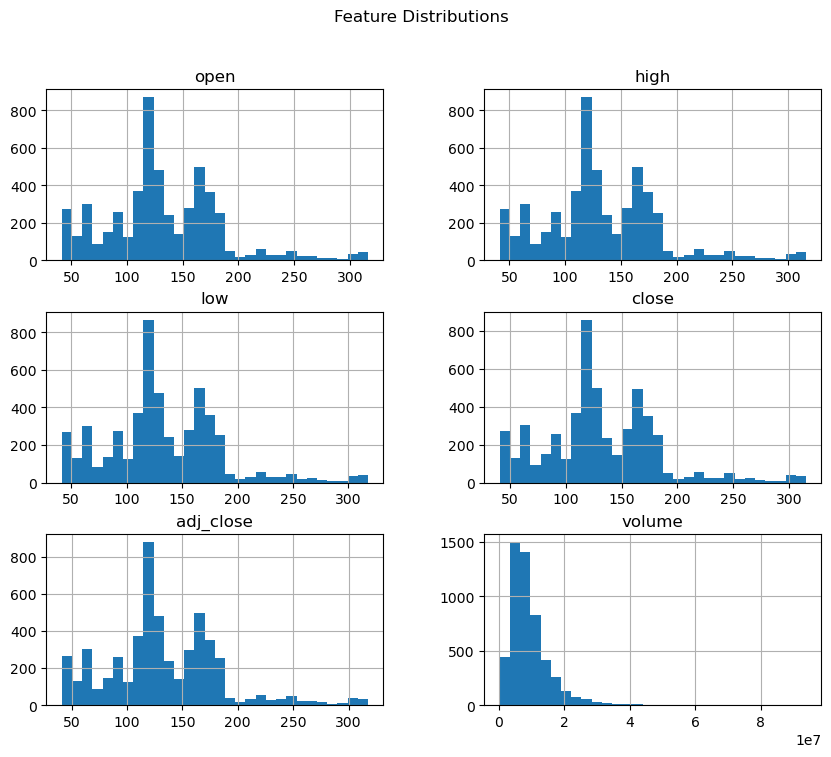

In [13]:
df.hist(bins=30, figsize=(10,8))
plt.suptitle("Feature Distributions")
plt.show()

In [18]:
df= df.dropna().drop_duplicates()

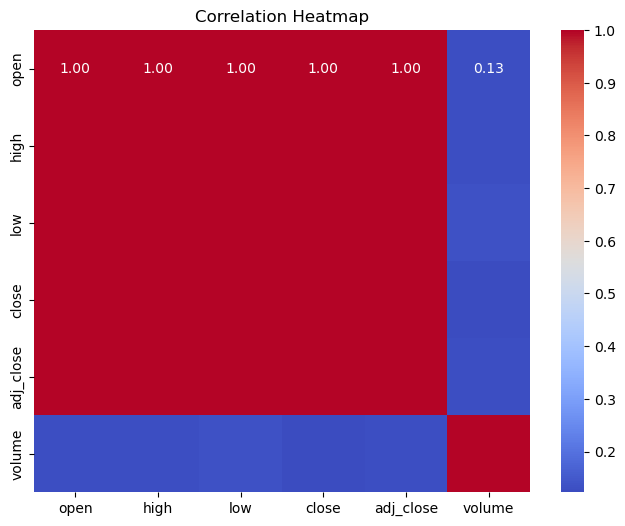

In [22]:
#4. Create a correlation heatmap to identify which features are highly correlated with the target variable (close)
import seaborn as sns
num_df = df.select_dtypes(include=['number'])
corr = num_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [40]:
df.head()

,date,open,high,low,close,adj_close,volume
0,2004-11-18,44.380001,44.380001,44.490002,44.070000,44.430000,5992000
1,2004-11-19,44.779999,44.779999,44.919998,44.470001,44.490002,11655300
2,2004-11-22,44.950001,44.950001,44.970001,44.740002,44.750000,11996000
3,2004-11-23,44.750000,44.750000,44.919998,44.720001,44.880001,3169200
4,2004-11-24,45.049999,45.049999,45.049999,44.790001,44.930000,6105100


In [41]:
#5. Select independent variables (e.g., Open, High, Low, Volume) and target variable (Close/Price).
X = df[['open', 'high', 'low', 'volume']]
print(X)

            open        high         low    volume
0      44.380001   44.380001   44.490002   5992000
1      44.779999   44.779999   44.919998  11655300
2      44.950001   44.950001   44.970001  11996000
3      44.750000   44.750000   44.919998   3169200
4      45.049999   45.049999   45.049999   6105100
...          ...         ...         ...       ...
5210  310.500000  310.500000  311.239990   7418200
5211  313.119995  313.119995  313.140015  10891500
5212  313.049988  313.049988  313.529999  19886800
5213  308.549988  308.549988  309.660004  10326700
5214  308.269989  308.269989  309.309998   9697400

[5215 rows x 4 columns]


In [42]:
y = df['close']
print(y)

0        44.070000
1        44.470001
2        44.740002
3        44.720001
4        44.790001
           ...    
5210    309.839996
5211    310.700012
5212    311.000000
5213    307.630005
5214    306.709991
Name: close, Length: 5215, dtype: float64


In [43]:
#6. Split the dataset into training (80%) and testing (20%) sets.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [44]:
X_train

,open,high,low,volume
2173,120.949997,120.949997,122.349998,14697100
927,91.730003,91.730003,92.000000,8809600
2499,118.519997,118.519997,118.820000,6417500
45,42.240002,42.240002,42.560001,1332500
1741,161.839996,161.839996,162.029999,15390800
...,...,...,...,...
466,58.740002,58.740002,58.970001,2763400
3092,117.510002,117.510002,117.730003,10665800
3772,137.979996,137.979996,138.220001,8776000
5191,306.200012,306.200012,306.510010,7053700


In [48]:
y_train

2173    120.589996
927      90.940002
2499    117.879997
45       42.099998
1741    158.300003
           ...    
466      58.250000
3092    116.440002
3772    137.639999
5191    304.820007
860      90.120003
Name: close, Length: 4172, dtype: float64

In [49]:
X_test

,open,high,low,adj_close,volume
1897,157.500000,157.500000,158.309998,155.410004,27399400
877,87.000000,87.000000,87.599998,87.129997,9437900
4431,169.619995,169.619995,170.210007,170.070007,2982700
4724,178.130005,178.130005,178.729996,177.649994,4740700
1595,139.050003,139.050003,139.360001,138.880005,9553700
...,...,...,...,...,...
1867,159.429993,159.429993,160.639999,160.000000,9914400
2727,108.529999,108.529999,108.660004,108.489998,4104800
841,93.800003,93.800003,94.000000,93.110001,12389000
1893,152.679993,152.679993,152.850006,151.889999,6212900


In [50]:
y_test

1897    154.869995
877      86.230003
4431    169.509995
4724    177.509995
1595    138.669998
           ...    
1867    159.020004
2727    108.330002
841      93.059998
1893    151.630005
175      42.990002
Name: close, Length: 1043, dtype: float64

In [51]:
#7. Train a Linear Regression model on the training set.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

if 'date' in df.columns:
    data = df.drop(columns=['date'])

X = data.drop(columns=['close'])   
y = data['close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [52]:
data.head()

,open,high,low,close,adj_close,volume
0,44.380001,44.380001,44.490002,44.070000,44.430000,5992000
1,44.779999,44.779999,44.919998,44.470001,44.490002,11655300
2,44.950001,44.950001,44.970001,44.740002,44.750000,11996000
3,44.750000,44.750000,44.919998,44.720001,44.880001,3169200
4,45.049999,45.049999,45.049999,44.790001,44.930000,6105100


In [53]:
#8. Evaluate the model using Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R² score on the test set.
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


Model Evaluation:
MSE: 0.13509776518137695
RMSE: 0.3675564789000147
R² Score: 0.9999493679331694


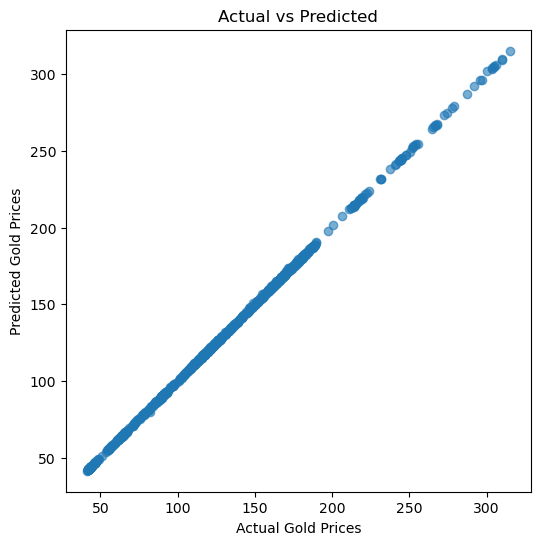

In [55]:
#9. Plot Actual vs. Predicted gold prices to visualize model performance.
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Gold Prices")
plt.ylabel("Predicted Gold Prices")
plt.title("Actual vs Predicted")
plt.show()

In [58]:
#10. Interpret the model coefficients. Which features have the most significant impact on gold price prediction?
coef_df = pd.DataFrame({"Feature": X.columns,"Coefficient": model.coef_})
print("\nModel Coefficients:\n", coef_df)
#adj_close,open and high,low,volume are decreasing order of impactfulnness on gold price.


Model Coefficients:
      Feature   Coefficient
0       open  3.618257e-01
1       high  3.618257e-01
2        low -3.520350e-01
3  adj_close  6.258093e-01
4     volume -2.883189e-08
